<a href="https://colab.research.google.com/github/dinuka125/japura-Git-Workshop/blob/master/CARG_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/My Drive/csv_files/'

Mounted at /content/drive


In [2]:
import numpy as np

data=np.load(path+'dataCARG.npy')
target=np.load(path+'targetCARG.npy')

In [3]:
train_data=data[:1647]
train_target=target[:1647]

test_data=data[1647:]
test_target=target[1647:]

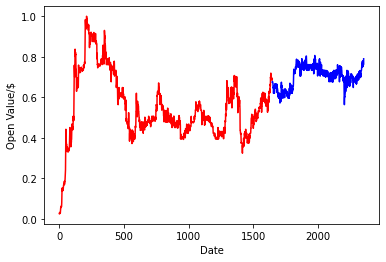

In [4]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1647,2354,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam',metrics=['mse', 'mae', 'mape'])

In [6]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.10)

Epoch 1/200
47/47 [==============================] - 39s 100ms/step - loss: 0.0467 - mse: 0.0467 - mae: 0.1479 - mape: 30.7129 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0292 - val_mape: 5.1871
Epoch 2/200
47/47 [==============================] - 3s 61ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0529 - mape: 10.9152 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0475 - val_mape: 8.2152
Epoch 3/200
47/47 [==============================] - 3s 61ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0540 - mape: 11.1797 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0501 - val_mape: 8.6752
Epoch 4/200
47/47 [==============================] - 3s 61ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0499 - mape: 10.0993 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0273 - val_mape: 4.8660
Epoch 5/200
47/47 [==============================] - 3s 62ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0473 - mape: 10.8846 - val_loss: 9.9855e-04 - val_mse: 9.9855e-04 - val_mae: 0.0256 - val_mape: 4.

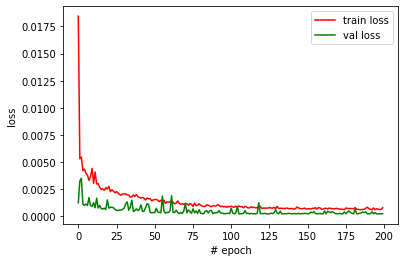

In [7]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)
print(result.shape)
print(test_target.shape)

r2 score: 0.8861858728240852
(707, 1)
(707,)


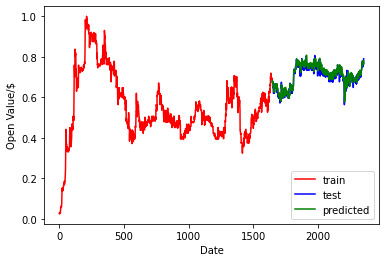

In [9]:
#test_x_range=np.arange(1000,1209,1)


test_x_range=np.arange(1647,2354,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

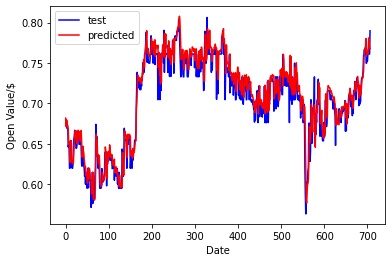

In [10]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()